In [41]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv(r"D:\SurvivalAnalysis\TimeVarying\Backblaze\Preprocessed\20_train_preprocessed.csv")

True
True
True
True
True


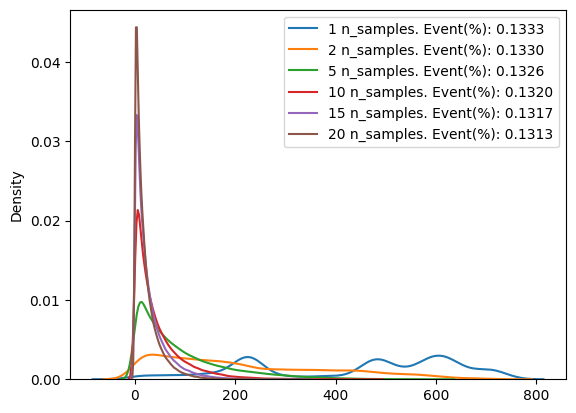

In [120]:
df_t = None
for n_samples in [1, 2, 5, 10, 15, 20]: # , 30, 40, 50]:
    df_ = pd.read_csv(rf"D:\SurvivalAnalysis\TimeVarying\Backblaze\Preprocessed\{n_samples}_train_preprocessed.csv")
    t = df_.groupby("id").agg({"start": "min", "stop": "max"})
    t["time"] = t["stop"] -  t["start"]
    evs = df_.groupby("id").agg({"event": ["max", len]})
    event_ratio = (evs["event"]["max"] * evs["event"]["len"]).sum() / evs['event']['len'].sum()
    sns.kdeplot(df_["stop"] -  df_["start"], label=f"{n_samples} n_samples. Event(%): {event_ratio:.4f}")
    if not(df_t is None):
        print((df_t["time"] == t["time"]).all())
    df_t = t
plt.legend()

In [110]:
df_ = pd.read_csv(rf"D:\SurvivalAnalysis\TimeVarying\Backblaze\Preprocessed\20_train_preprocessed.csv")
evs = df_.groupby("id").agg({"event": ["max", len]})
np.bincount(evs["event"]["len"])

array([    0,    14,    14,    77,    46,    15,     8,    21,     7,
          16,    10,     8,    38,    15,    60,    13,    15,     6,
          11,    11, 16951], dtype=int64)

In [ ]:
array([    0,    14,    14,    77,    46,    15,     8,    21,     7,
          16,    10,     8,    38,    15,    60,    13,    15,     6,
          11,    11,    48,     8,     7,     7,     9,    18,    10,
           6,    15,    11,    11,     7,    12,    12,     5,    12,
           3,    17,     8,    42,     6,     9,     7,    10,     7,
          12,    11,    16,     4,    11, 16590], dtype=int64)

In [123]:
df_gs = pd.read_csv(r"D:\SurvivalAnalysis\TimeVarying\Backblaze\grid_search_merged.csv")

In [124]:
for g, g_sample in df_gs.groupby("train_samples"):
    g_sample_ne = g_sample[g_sample["error"] == 0]
    print(f"{g}, p_val: {g_sample_ne['p_val'].mean():.3f}, valid_rate: {g_sample_ne.shape[0]/g_sample.shape[0]}")
    # print(g, g_sample_ne["ci_train"].mean(), g_sample_ne["ci_test"].mean())
    # print(g, g_sample_ne["ibs_train"].mean(), g_sample_ne["ibs_test"].mean())

1, p_val: 0.714, valid_rate: 0.6
2, p_val: 0.800, valid_rate: 0.6
5, p_val: 0.750, valid_rate: 0.48
10, p_val: 0.656, valid_rate: 0.48
15, p_val: 0.667, valid_rate: 0.48
20, p_val: 0.589, valid_rate: 0.48
30, p_val: 0.756, valid_rate: 0.48
40, p_val: 0.750, valid_rate: 0.48
50, p_val: 0.750, valid_rate: 0.48


<Axes: title={'center': 'ibs_test'}, xlabel='train_samples'>

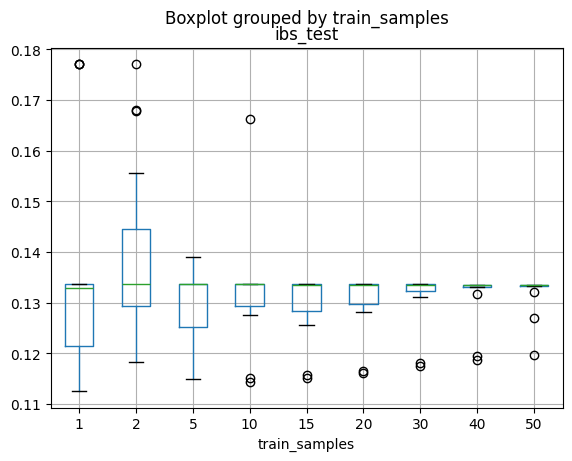

In [118]:
df_gs.boxplot(column="ibs_test", by="train_samples")